<a href="https://colab.research.google.com/github/shahabas9/Deep_learning_basics/blob/main/Data%20augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!rm -rf ~/.kaggle

In [56]:
! mkdir ~/.kaggle

In [48]:
!ls -l ~/.kaggle

total 0


In [49]:
!ls -l ~./.kaggle/

ls: cannot access '~./.kaggle/': No such file or directory


In [57]:
!chmod 600 /content/kaggle.json

In [58]:
!cp /content/kaggle.json  /root/.kaggle/

In [59]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:10<00:00, 116MB/s] 
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [60]:
import zipfile

In [61]:
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D

In [63]:
train_ds=keras.utils.image_dataset_from_directory(directory="/content/train/",batch_size=32,image_size=(256,256),labels="inferred",label_mode="int")
validation_ds=keras.utils.image_dataset_from_directory(directory="/content/test",batch_size=32,image_size=(256,256),labels="inferred",label_mode="int")

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [64]:
def process(image,label):
  tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [65]:
model=Sequential()

In [66]:
# first convulation layer
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")) # maxpooling layer

# second convulation layer
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# third convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten()) #  flattening the layer
model.add(Dense(128,activation="relu")) #  first nueral network
model.add(Dense(64,activation="relu")) # second neural network
model.add(Dense(1,activation="sigmoid")) # binary classification and output

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [68]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [70]:
model.fit(train_ds,epochs=20,validation_data=validation_ds,verbose=True,batch_size=128)

Epoch 1/20
625/625 [==============================] - 52s 83ms/step - loss: 0.2781 - accuracy: 0.8818 - val_loss: 1.0899 - val_accuracy: 0.6310
Epoch 2/20
625/625 [==============================] - 56s 89ms/step - loss: 0.1913 - accuracy: 0.9344 - val_loss: 1.5336 - val_accuracy: 0.6292
Epoch 3/20
625/625 [==============================] - 50s 80ms/step - loss: 0.1338 - accuracy: 0.9564 - val_loss: 1.5862 - val_accuracy: 0.6384
Epoch 4/20
625/625 [==============================] - 52s 82ms/step - loss: 0.1109 - accuracy: 0.9667 - val_loss: 1.4763 - val_accuracy: 0.6354
Epoch 5/20
625/625 [==============================] - 50s 79ms/step - loss: 0.0767 - accuracy: 0.9765 - val_loss: 2.0444 - val_accuracy: 0.6308
Epoch 6/20
625/625 [==============================] - 51s 81ms/step - loss: 0.0742 - accuracy: 0.9786 - val_loss: 1.8389 - val_accuracy: 0.6272
Epoch 7/20
625/625 [==============================] - 51s 82ms/step - loss: 0.1008 - accuracy: 0.9703 - val_loss: 1.9461 - val_accuracy:

KeyboardInterrupt: ignored

In [71]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [72]:
data_generator=ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.3
)

In [73]:
import cv2
import matplotlib.pyplot as plt

In [74]:
dog=cv2.imread("beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg")

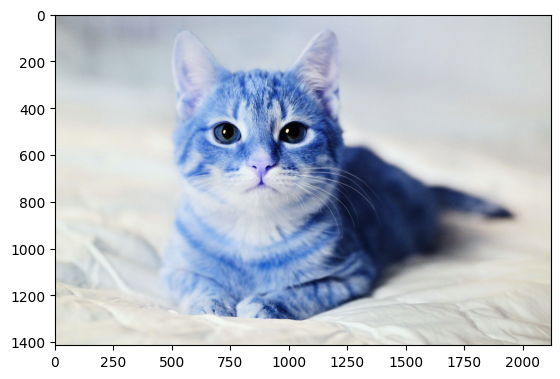

In [75]:
plt.imshow(dog)

In [76]:
dog.shape

(1414, 2121, 3)

In [77]:
dog=cv2.resize(dog,(256,256))

In [78]:
dog=dog.reshape((1,256,256,3))

In [83]:
i=0
for output in data_generator.flow(dog,save_to_dir="/content/augmnted_image"):
  i=i+1
  if i==10:
    break

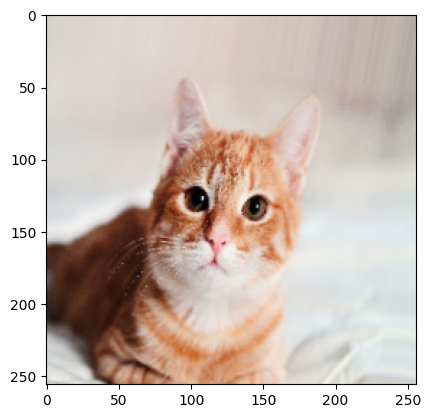

In [84]:
aug_1=cv2.imread("/content/augmnted_image/_0_3055.png")
plt.imshow(aug_1)

In [ ]:
model.predict(dog)

1/1 [==============================] - 0s 23ms/step


array([[0.4808425]], dtype=float32)

1/1 [==============================] - 0s 18ms/step


array([[0.4808425]], dtype=float32)

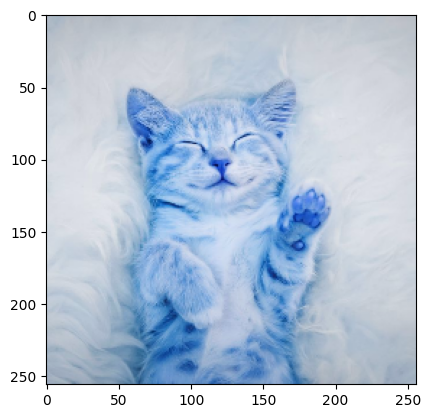

In [ ]:
cat=cv2.imread("cute-cat-photos-1593441022.jpg")
cat=cv2.resize(cat,(256,256))
cat=cat.reshape((1,256,256,3))
model.predict(cat)

In [ ]:
cat2=cv2.imread("images.jpeg")
cat2=cv2.resize(cat2,(256,256))
cat2=cat2.reshape((1,256,256,3))
model.predict(cat2)

1/1 [==============================] - 0s 21ms/step


array([[0.17364821]], dtype=float32)

In [ ]:
dog2=cv2.imread("download.jpeg")
dog2=cv2.resize(dog2,(256,256))
dog2=dog2.reshape((1,256,256,3))
model.predict(dog2)

1/1 [==============================] - 0s 85ms/step


array([[0.1467948]], dtype=float32)

In [85]:
data_generator=ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255
)

In [86]:
train_gen=data_generator.flow_from_directory(
    "/content/train",
    batch_size=15,
    target_size=(256,256),
    class_mode="binary"
)

Found 20000 images belonging to 2 classes.


In [87]:
test_generator=ImageDataGenerator(

    rescale=1/255
)

In [88]:
test_gen=test_generator.flow_from_directory(
    "/content/test",
    batch_size=15,
    target_size=(256,256),
    class_mode="binary"
)

Found 5000 images belonging to 2 classes.


In [89]:
model=Sequential()

In [90]:
model.add(Conv2D(24,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")) # maxpooling layer

# second convulation layer
model.add(Conv2D(48,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# third convolution layer
model.add(Conv2D(96,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten()) #  flattening the layer
model.add(Dense(64,activation="relu")) #  first nueral network
model.add(Dense(32,activation="relu")) # second neural network
model.add(Dense(1,activation="sigmoid")) # binary classif

In [91]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [92]:
model.fit_generator(train_gen,epochs=1,validation_data=test_gen,verbose=True)

<ipython-input-92-513542d45925>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen,epochs=1,validation_data=test_gen,verbose=True)


1334/1334 [==============================] - 343s 254ms/step - loss: 0.6704 - accuracy: 0.5814 - val_loss: 0.6329 - val_accuracy: 0.6328


In [93]:
model.save("/content/catdog.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
